# Data Analysis and Visualization of Thyroid Cancer Recurrence Dataset
# Building models for Classification using Logistic Regression, SVM (linear, rbf, polynomial kernel), Decision Tress, Random Forests.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Differentiated Thyroid Cancer Recurrence Dataset
- https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence

In [3]:
thyroid_cancer_recurrence_ds = pd.read_csv("C:\\Users\\PRATEEK MITTAL\\OneDrive\\Desktop\\Machine_Learning\\differentiated+thyroid+cancer+recurrence\\Thyroid_Diff.csv")
print(thyroid_cancer_recurrence_ds.head())
thyroid_cancer_recurrence_ds.shape

   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

(383, 17)

#### As through the datset printed above, we can observe that under the recurred column there can be only two possible cases i.e. 'Yes'  or 'No'. Therefore, it is a problem of Binary Classification.

## Descriptive Statistics :

In [4]:
thyroid_cancer_recurrence_ds.describe() 
# As .describe() gives descriptive statistics of numerical values in the dataset so here it is only returning the descriptive statistics of 'age' column.

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [5]:
thyroid_cancer_recurrence_ds.info()
# As the shape of the dataset is (387,17), therefore we can verify that there is no null value as there are 383 non-null values in all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

## Displaying the Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

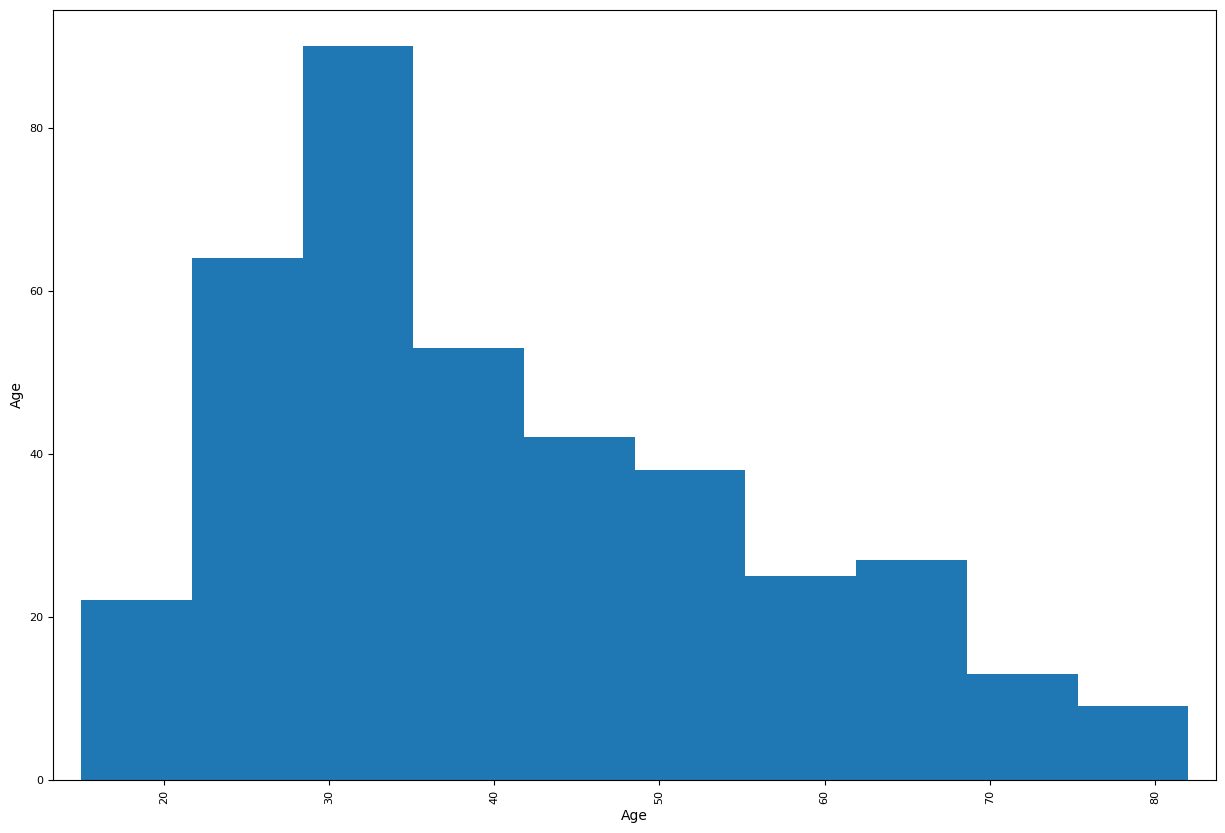

In [6]:
pd.plotting.scatter_matrix(thyroid_cancer_recurrence_ds,figsize = (15,10))
plt.show

## Converting all the non-numeric values to numeric values for both input and output.

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in thyroid_cancer_recurrence_ds.columns :
    thyroid_cancer_recurrence_ds[column] = le.fit_transform(thyroid_cancer_recurrence_ds[column])


## Slicing the dataset into input and output
- As the last column of our dataset is output, hence making every other column input as X and the last column output as y.

In [8]:
X = thyroid_cancer_recurrence_ds.iloc[:,:16].values
y = thyroid_cancer_recurrence_ds.iloc[:,16].values
X = pd.DataFrame(X)

In [9]:
print(y)
print(le.classes_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
['No' 'Yes']


## Splitting the dataset into training and testing dataset in the ratio of 8:2 respectively.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,stratify = y, random_state = 42)

## Visualizing the data :

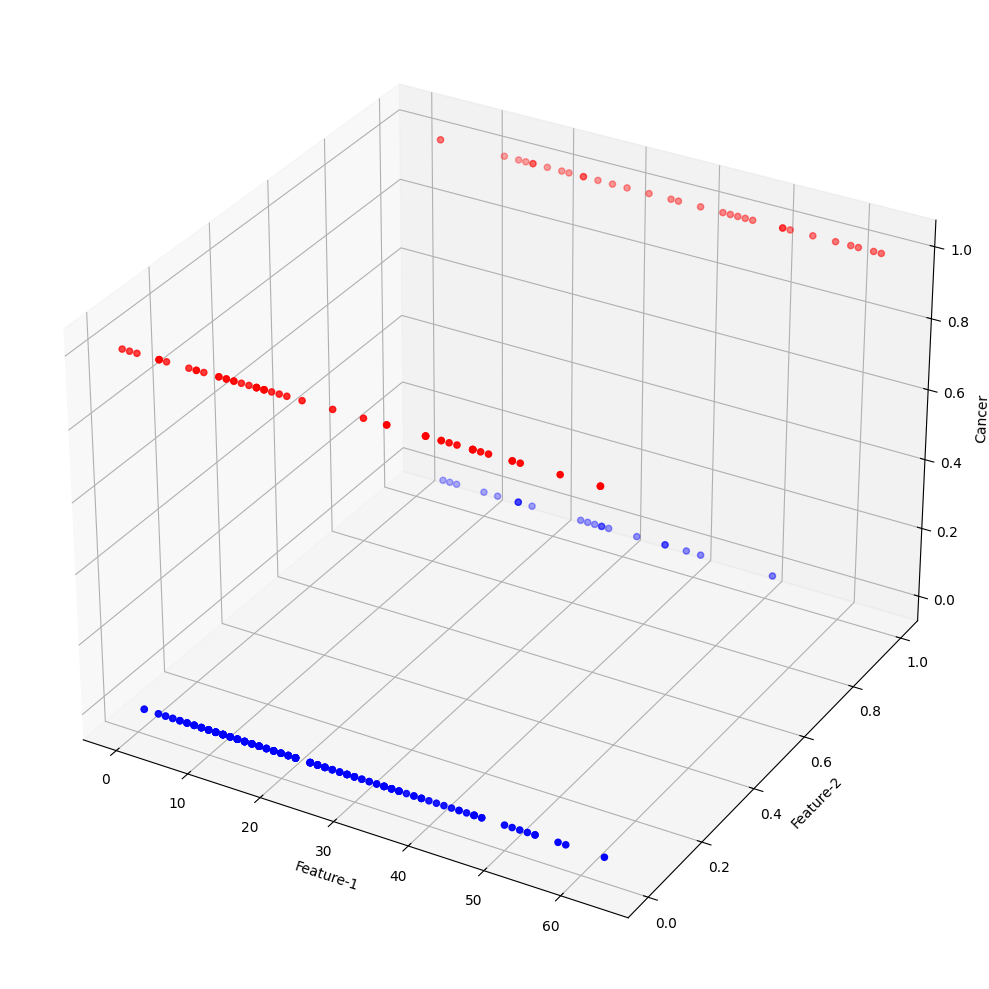

In [11]:
from mpl_toolkits.mplot3d import Axes3D

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_np[y_train==0, 0], X_train_np[y_train==0, 1], y_train_np[y_train==0], color="b");
ax.scatter(X_train_np[y_train==1, 0], X_train_np[y_train==1, 1], y_train_np[y_train==1], color="r");

ax.set_xlabel("Feature-1")
ax.set_ylabel("Feature-2")
ax.set_zlabel("Cancer")

plt.tight_layout()
plt.show()


## Using dimesionality reduction techniques to visualize the data.

In [12]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_train)

X_train_2D_pca = pca2.transform(X_train)

print(f'PCA Features: Number of samples and attributes: {X_train_2D_pca.shape}')

PCA Features: Number of samples and attributes: (306, 2)


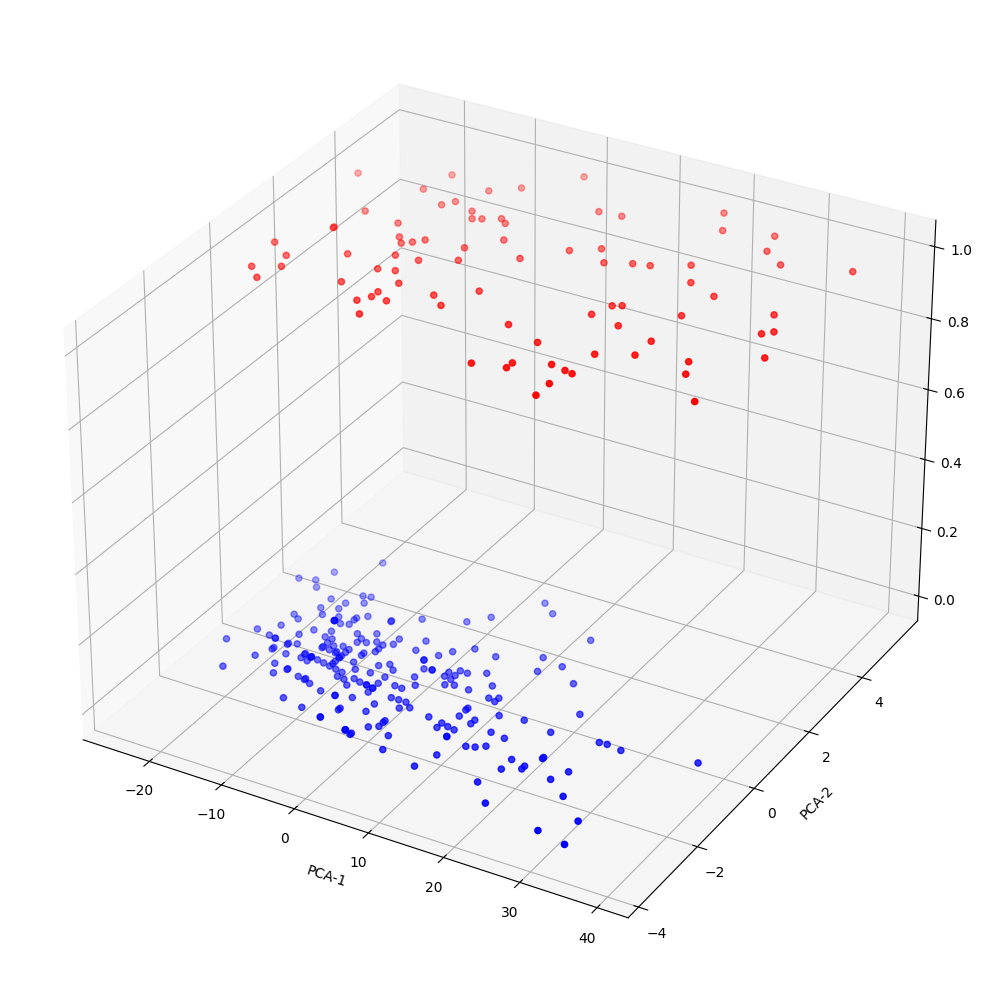

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_pca[y_train==0, 0], X_train_2D_pca[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train_2D_pca[y_train==1, 0], X_train_2D_pca[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")

plt.tight_layout()
plt.show()

In [14]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, init='pca', learning_rate='auto')

X_train_2D_tsne = tsne2.fit_transform(X_train)

print(f'tSNE Embedding: Number of samples and attributes: {X_train_2D_tsne.shape}')

tSNE Embedding: Number of samples and attributes: (306, 2)


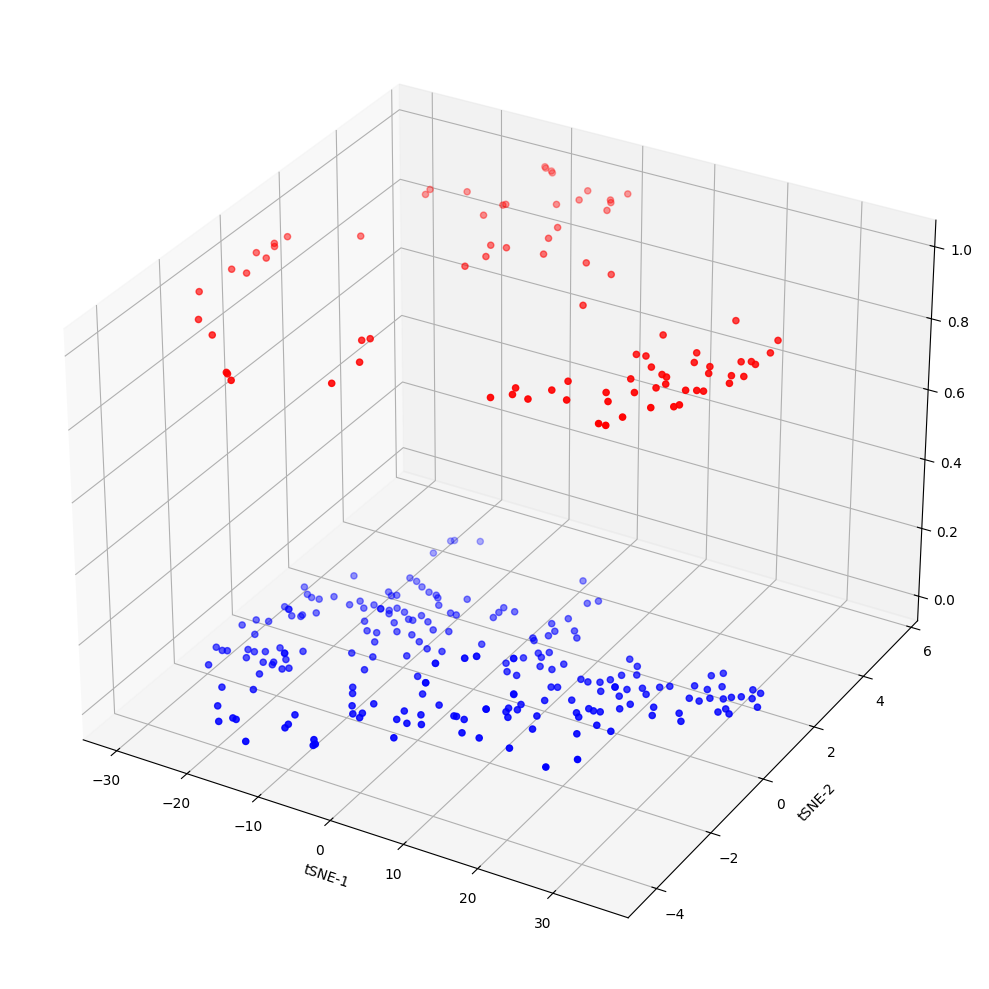

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_tsne[y_train==0, 0], X_train_2D_tsne[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train_2D_tsne[y_train==1, 0], X_train_2D_tsne[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("tSNE-1")
ax.set_ylabel("tSNE-2")

plt.tight_layout()
plt.show()

## Implementing Logistic Regression without feature scaling.

In [16]:
from sklearn.linear_model import LogisticRegression

thyroid_cancer_recurrence_clf = LogisticRegression()
thyroid_cancer_recurrence_clf.fit(X_train, y_train)

c:\Users\PRATEEK MITTAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
score = thyroid_cancer_recurrence_clf.score(X_test, y_test)
print(f'Classification accuray using raw data is {score}%')

Classification accuray using raw data is 0.922077922077922%


## Feature Scaling :

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [19]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Visualizing the dataset after feature scaling : 

In [20]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_train)

X_train_2D_pca = pca2.transform(X_train_std)

print(f'PCA Features: Number of samples and attributes: {X_train_2D_pca.shape}')

PCA Features: Number of samples and attributes: (306, 2)


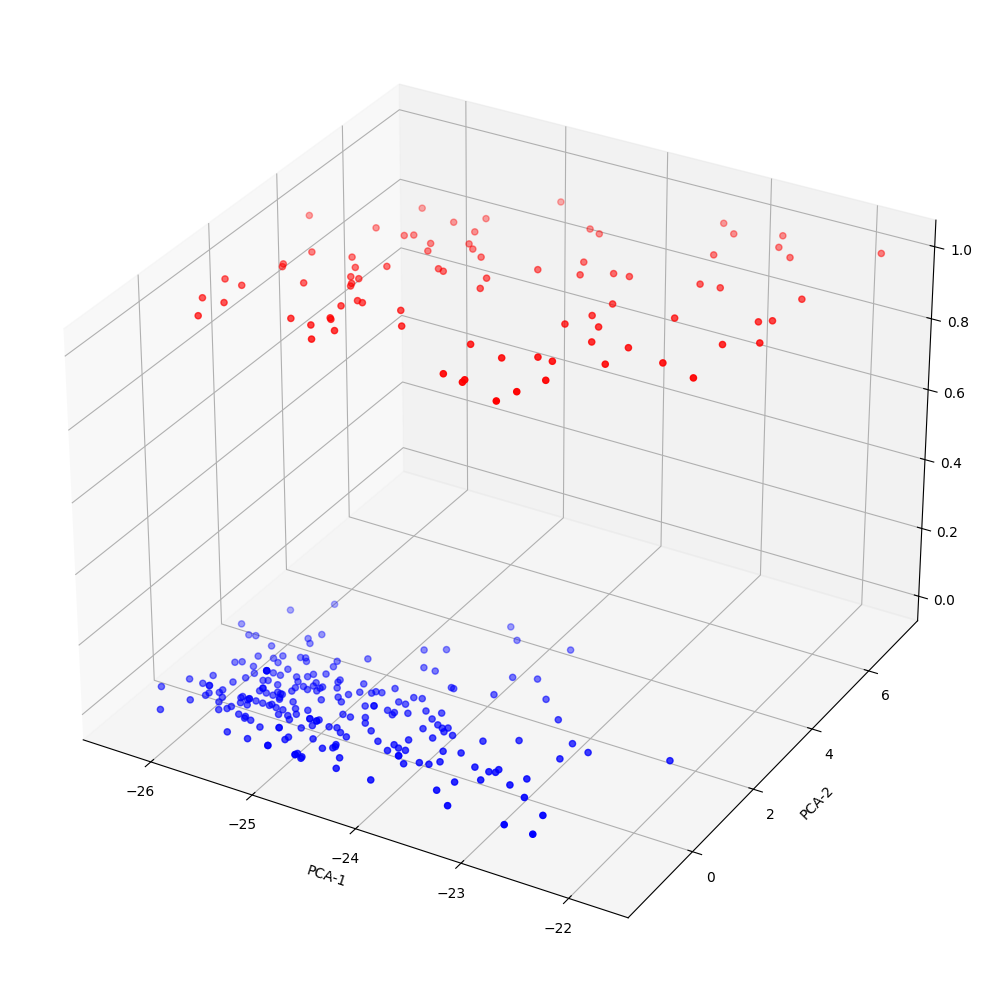

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_pca[y_train==0, 0], X_train_2D_pca[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train_2D_pca[y_train==1, 0], X_train_2D_pca[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")

plt.tight_layout()
plt.show()

In [22]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, init='pca', learning_rate='auto')

X_train_2D_tsne = tsne2.fit_transform(X_train)

print(f'tSNE Embedding: Number of samples and attributes: {X_train_2D_tsne.shape}')

tSNE Embedding: Number of samples and attributes: (306, 2)


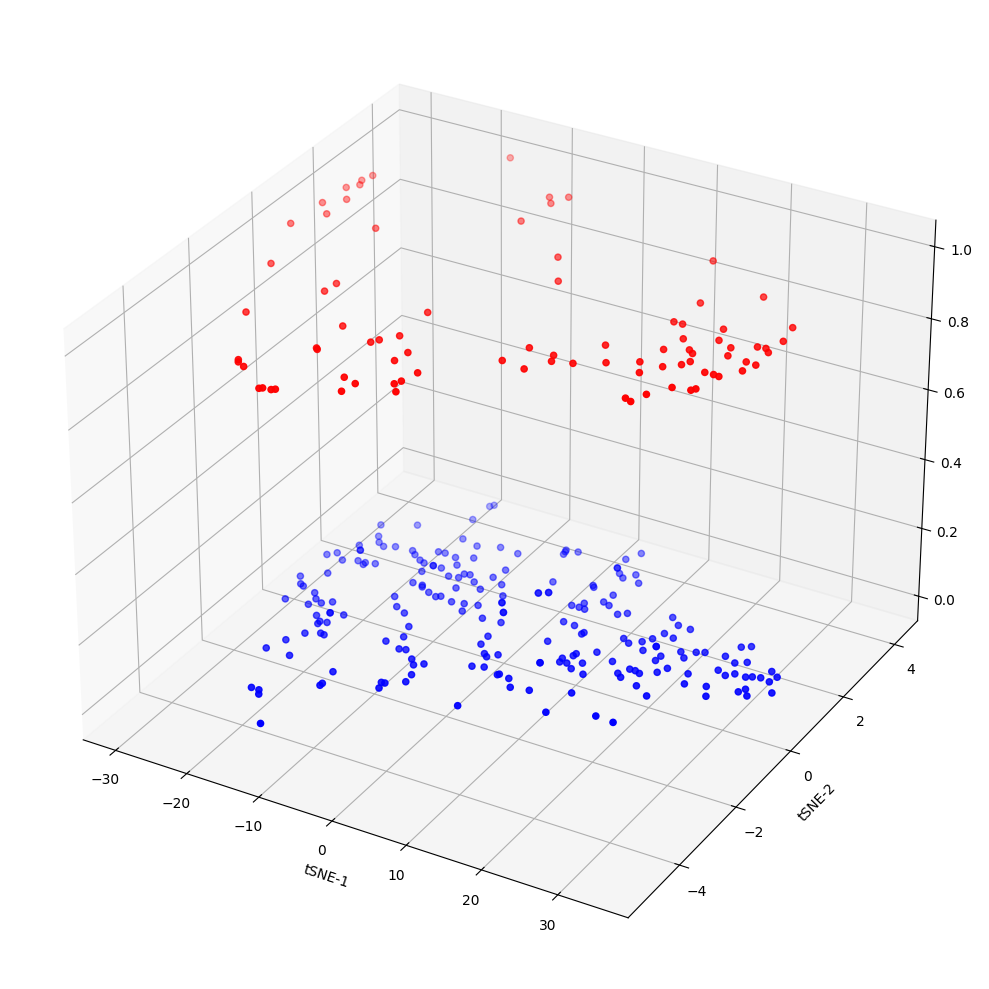

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_tsne[y_train==0, 0], X_train_2D_tsne[y_train==0, 1], y_train[y_train==0], color="b");
ax.scatter(X_train_2D_tsne[y_train==1, 0], X_train_2D_tsne[y_train==1, 1], y_train[y_train==1], color="r");

ax.set_xlabel("tSNE-1")
ax.set_ylabel("tSNE-2")

plt.tight_layout()
plt.show()

## Implementing Logistic Regression with feature scaling.

In [24]:
from sklearn.linear_model import LogisticRegression

thyroid_cancer_recurrence_clf_std = LogisticRegression()
thyroid_cancer_recurrence_clf_std.fit(X_train_std, y_train)


LogisticRegression()

In [25]:
y_pred = thyroid_cancer_recurrence_clf_std.predict(X_test_std)
print(y_pred)

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 1]


In [26]:
print(y_test)

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1]


In [27]:
score1 = thyroid_cancer_recurrence_clf_std.score(X_test_std, y_test)
print(f'Classification accuray after feature scaling is {score1}%')
print(f'Classification accuray using raw data is {score}%')

Classification accuray after feature scaling is 0.935064935064935%
Classification accuray using raw data is 0.922077922077922%


## Confusion Matrix :

In [28]:
from sklearn.metrics import confusion_matrix

confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confMatrix)

[[52  3]
 [ 2 20]]


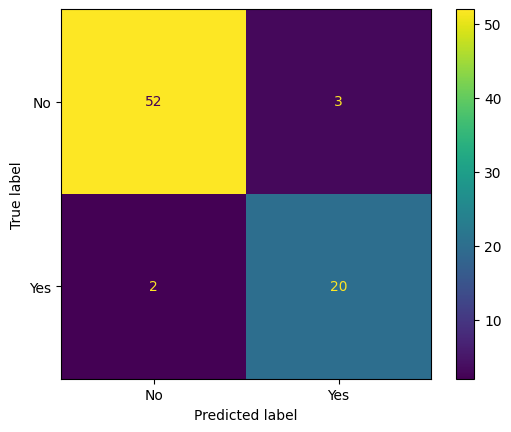

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix, display_labels=le.classes_)

disp.plot()
plt.show()

## Precision, Recall and F1 score :

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Precision: 0.870
Recall: 0.909
F1: 0.889


## Implementing Linear SVM on the dataset without feature scaling.

In [31]:
from sklearn import svm, metrics
linearSVM = svm.SVC(kernel='linear')
linearSVM.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
predicted = linearSVM.predict(X_test)
print(predicted)

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0]


Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.90      0.86      0.88        22

    accuracy                           0.94        77
   macro avg       0.93      0.91      0.92        77
weighted avg       0.93      0.94      0.93        77




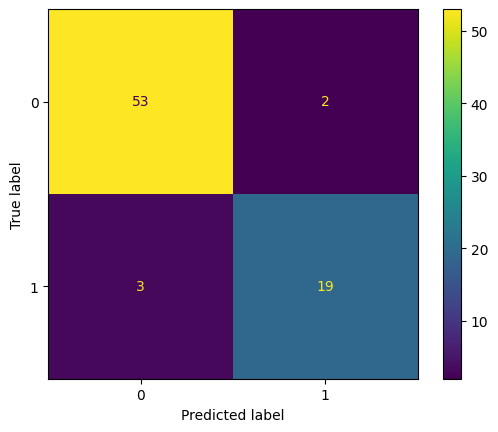

In [33]:
print("Classification report for classifier %s:\n%s\n"
      % (linearSVM, metrics.classification_report(y_test, predicted)))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

## Implementing Linear SVM on the dataset with feature scaling.

In [34]:
linearSVM_std = svm.SVC(kernel='linear')
linearSVM_std.fit(X_train_std, y_train)

SVC(kernel='linear')

Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.90      0.86      0.88        22

    accuracy                           0.94        77
   macro avg       0.93      0.91      0.92        77
weighted avg       0.93      0.94      0.93        77




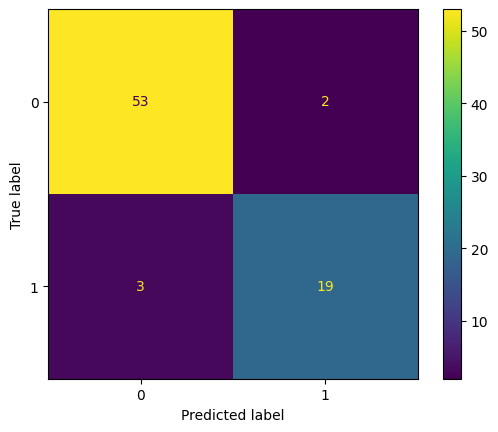

In [35]:
print("Classification report for classifier %s:\n%s\n"
      % (linearSVM_std, metrics.classification_report(y_test, predicted)))


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

## Implementing SVM with rbf Kernel without feature scaling. 

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.95      0.86      0.90        22

    accuracy                           0.95        77
   macro avg       0.95      0.92      0.93        77
weighted avg       0.95      0.95      0.95        77




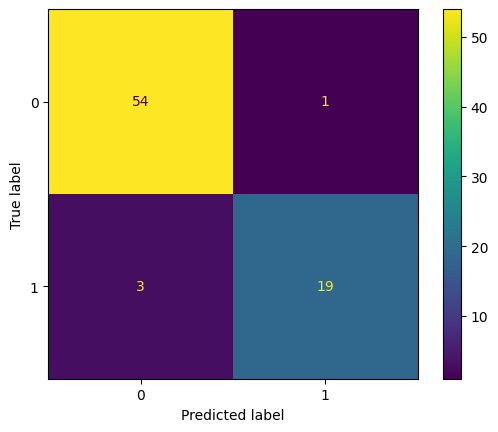

In [36]:
kernelSVM = svm.SVC(kernel='rbf')
kernelSVM.fit(X_train_std, y_train)

predicted = kernelSVM.predict(X_test_std)
print("Classification report for classifier %s:\n%s\n"
      % (kernelSVM, metrics.classification_report(y_test, predicted)))


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

## Implementing SVM with rbf Kernel with feature scaling.

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.95      0.86      0.90        22

    accuracy                           0.95        77
   macro avg       0.95      0.92      0.93        77
weighted avg       0.95      0.95      0.95        77




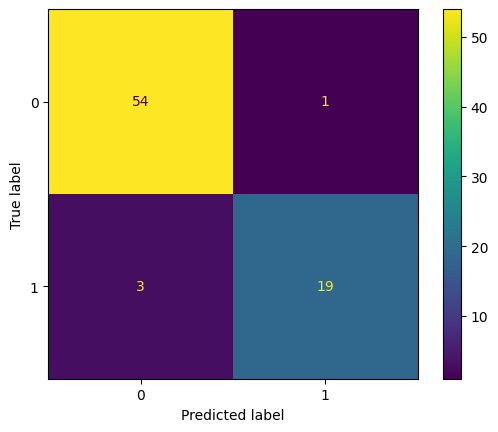

In [37]:
kernelSVM_std = svm.SVC(kernel='rbf')
kernelSVM_std.fit(X_train_std, y_train)

predicted = kernelSVM_std.predict(X_test_std)
print("Classification report for classifier %s:\n%s\n"
      % (kernelSVM_std, metrics.classification_report(y_test, predicted)))


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

## Implementing SVM with polynomial Kernel without feature scaling. 

Classification report for classifier SVC(kernel='poly'):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        55
           1       0.94      0.73      0.82        22

    accuracy                           0.91        77
   macro avg       0.92      0.85      0.88        77
weighted avg       0.91      0.91      0.91        77




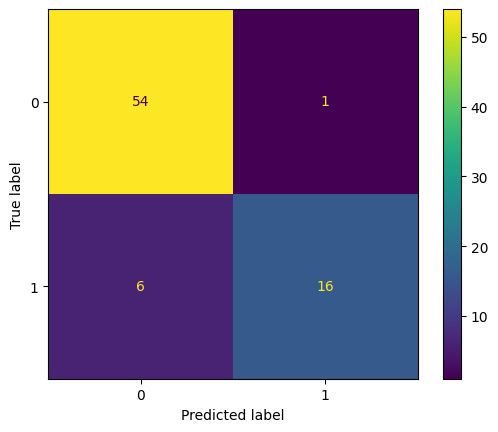

In [38]:
kernelSVM = svm.SVC(kernel='poly')
kernelSVM.fit(X_train_std, y_train)

predicted = kernelSVM.predict(X_test_std)
print("Classification report for classifier %s:\n%s\n"
      % (kernelSVM, metrics.classification_report(y_test, predicted)))


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

## Implementing SVM with polynomial Kernel with feature scaling.

Classification report for classifier SVC(kernel='poly'):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        55
           1       0.94      0.73      0.82        22

    accuracy                           0.91        77
   macro avg       0.92      0.85      0.88        77
weighted avg       0.91      0.91      0.91        77




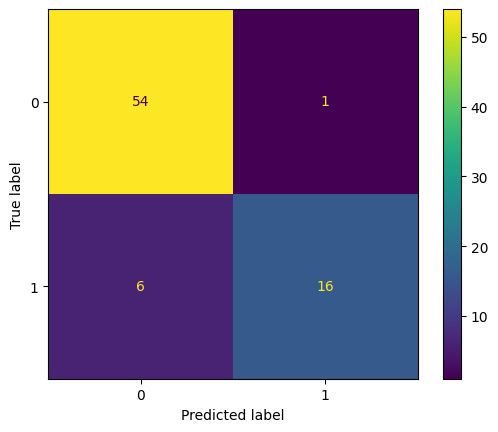

In [39]:
kernelSVM = svm.SVC(kernel='poly')
kernelSVM.fit(X_train_std, y_train)

predicted = kernelSVM.predict(X_test_std)
print("Classification report for classifier %s:\n%s\n"
      % (kernelSVM, metrics.classification_report(y_test, predicted)))


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

## Implementing Decision Trees on the dataset for classification.

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4, random_state=1)

In [41]:
tree_clf.score(X_test,y_test)

0.961038961038961

[Text(0.5625, 0.9, 'x[15] <= 2.5\ngini = 0.404\nsamples = 306\nvalue = [220, 86]'),
 Text(0.3333333333333333, 0.7, 'x[15] <= 0.5\ngini = 0.113\nsamples = 232\nvalue = [218, 14]'),
 Text(0.44791666666666663, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[10] <= 1.5\ngini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.08333333333333333, 0.3, 'x[0] <= 16.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.25, 0.3, 'x[5] <= 1.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.5, 0.5, 'x[14] <= 0.5\ngini = 0.055\nsamples = 213\nvalue = [207, 6]'),
 Text(0.4166666666666667, 0.3, 'x[11] <= 3.5\ngini = 0.02\nsamples = 203\nvalue = [201, 2]'),
 Text(0.375, 0.1, 'gini = 0.01\nsamples = 201

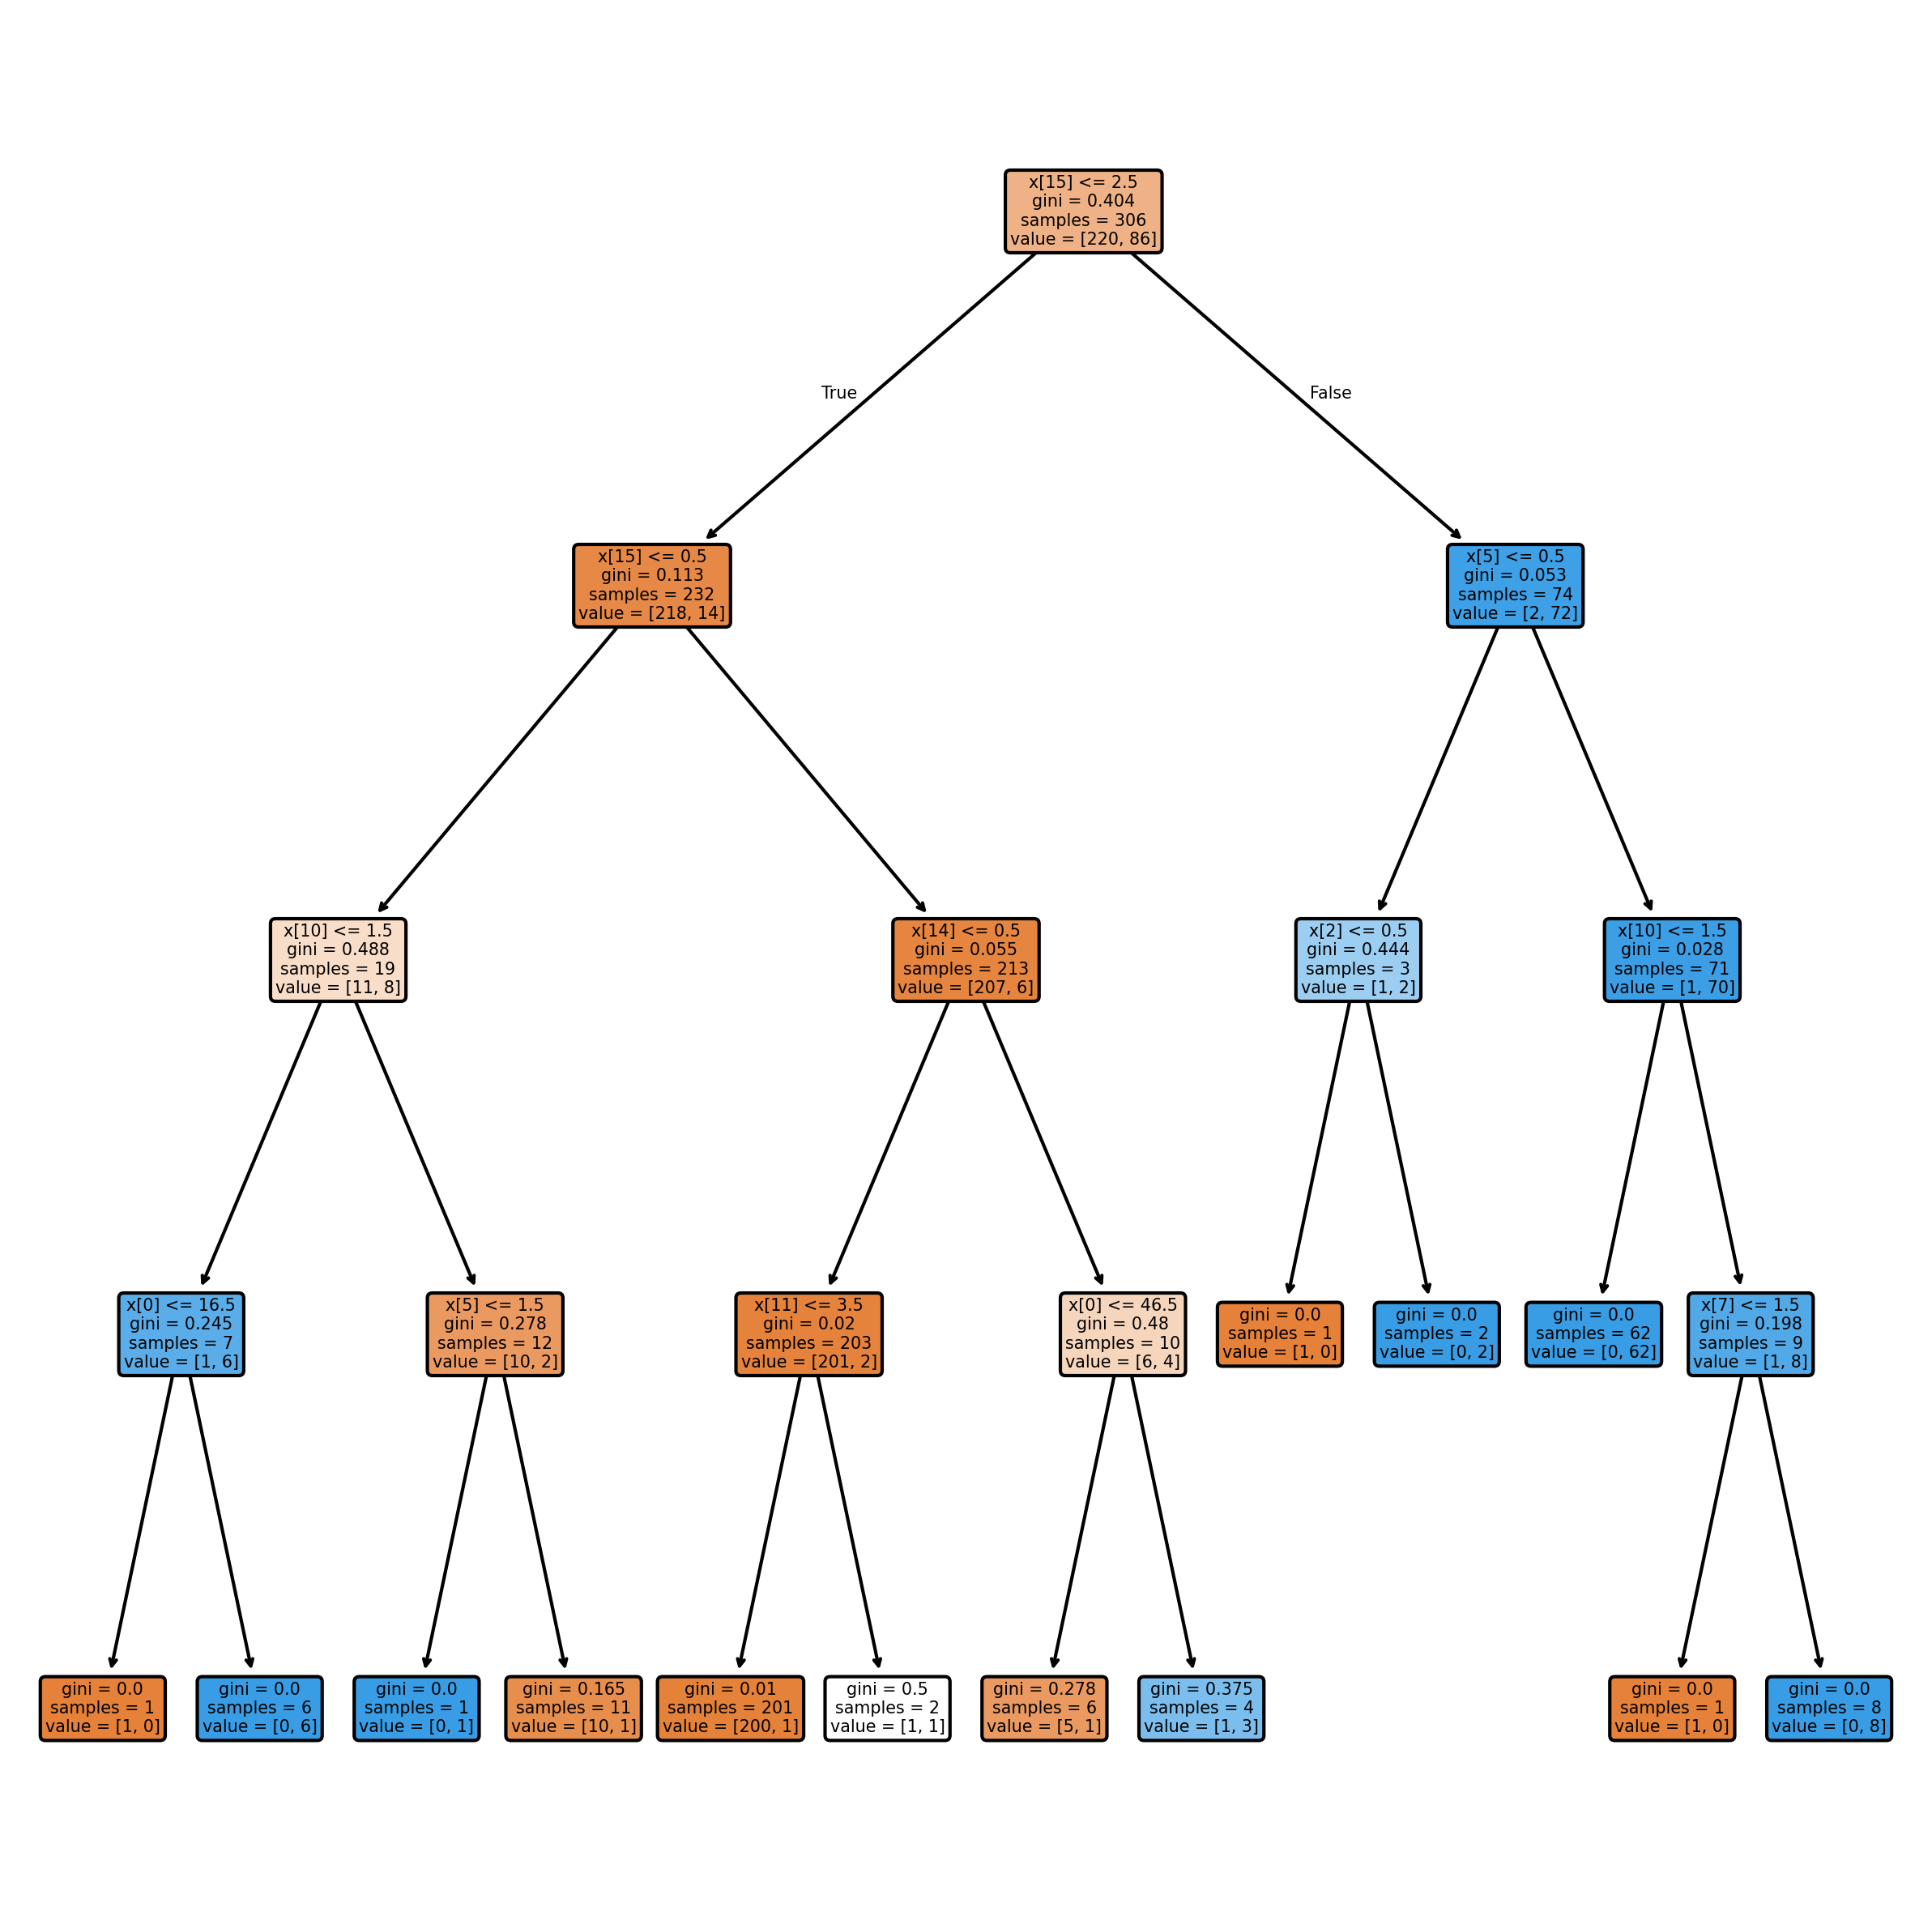

In [42]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize=(10,10),dpi = 300)
tree.plot_tree(tree_clf,rounded = True, filled = True)

## Bagging Decision Tress for Classification.

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf  = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples= 100, bootstrap= True, n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
print(y_pred)
bag_clf.score(X_test,y_test)

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0]


0.961038961038961

## Implementing Random Forest for classification on the dataset.

In [46]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0]


In [47]:
rnd_clf.score(X_test,y_test)

0.974025974025974